# Лабораторная работа №4
## Сегментация изображений
Выполнили: 

Гуров Михаил Алексеевич 408510 R3243  
Зыкин Леонид Витальевич 470912 R3335  
Куликов Илья Вячеславович 470122 R3243



### Цель работы:
Освоение основных способов сегментации изображений на семантические области.

# 1. Теоретическое обоснование применяемых методов и функций сегментации изображений

### 1.1. Бинаризация

Бинаризация –  процесс при котором изображение преобразуется в черно-белый формат по заданному порогу. Используются два метода:

Простая бинаризация – задается фиксированный порог (127), пиксели выше порога становятся белыми (255), ниже – черными (0). Выбор порога зависит от освещенности и контрастности изображения.

Метод Отсу – автоматический выбор порога на основе гистограммы изображения, минимизирующий внутриклассовую дисперсию. Подходит для изображений с разными уровнями освещенности.

### 1.2. Сегментация по цвету

Используется сегментация кожи на изображении лица в цветовом пространстве HSV. Выбирается диапазон оттенков, соответствующий человеческой коже. Выбор границ диапазона осуществляется экспериментально на основе анализа цветовой модели кожи и адаптации к условиям освещения.

### 1.3. Кластеризация методом k-средних

Метод k-средних используется для разбиения пикселей изображения на несколько кластеров в цветовом пространстве Lab. Это позволяет выделить цветовые группы объектов. Количество кластеров (k) выбирается в зависимости от количества ожидаемых объектов на изображении. 

### 1.4. Текстурная сегментация

Для анализа текстуры применяются три характеристики:

Энергия – оценивается с помощью свертки изображения с ядром, что позволяет выявить однородные участки.

Контраст – вычисляется с использованием оператора Лапласа, помогает обнаруживать границы и резкие переходы.

Энтропия – измеряет степень неопределенности изображения, используется для анализа неоднородных текстур.




# 2. Ход работы


Импорт библиотек

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull

## 2.1. Бинаризация

Бинаризация выполняется двумя методами: пороговой обработкой (фиксированное значение) и методом Оцу (автоматический порог).

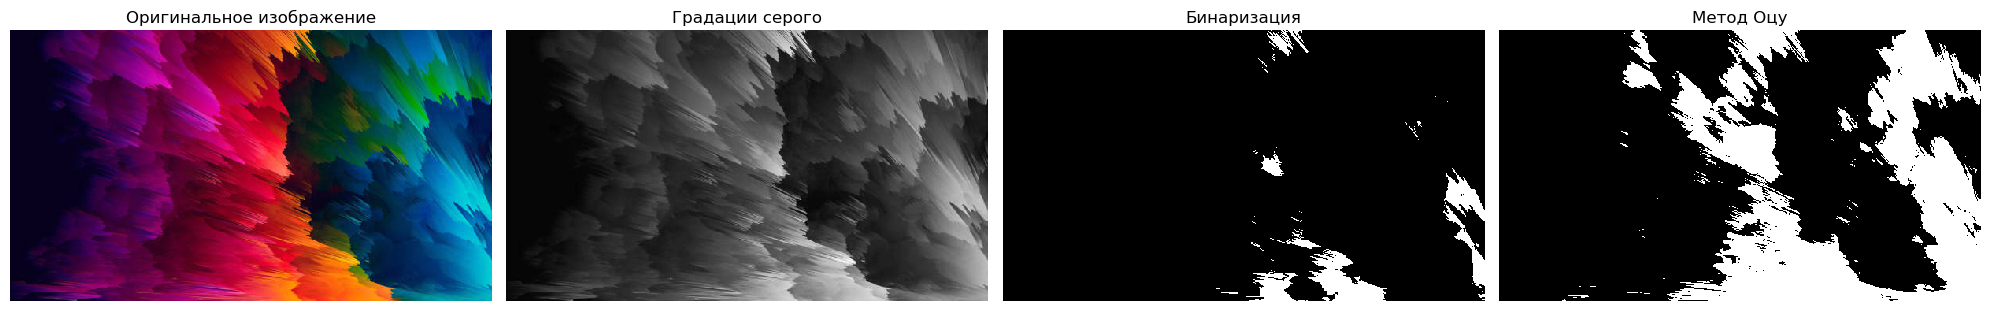

In [ ]:

# 1. Бинаризация изображения
image_path = 'image2.jpg'  
image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Загрузка изображения в цвете

# Преобразуем цветное изображение в градации серого для бинаризации
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Применение простого порога
threshold = 127
_, binary = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)

# Применение метода Отсу
_, binary_otsu = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Отображение изображений
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Преобразуем BGR в RGB для корректного отображения
axs[0].set_title('Оригинальное изображение')
axs[0].axis('off') 

axs[1].imshow(gray_image, cmap='gray')
axs[1].set_title('Градации серого')
axs[1].axis('off') 

axs[2].imshow(binary, cmap='gray')
axs[2].set_title('Бинаризация')
axs[2].axis('off') 

axs[3].imshow(binary_otsu, cmap='gray')
axs[3].set_title('Метод Отсу')
axs[3].axis('off')  

plt.tight_layout()  
plt.show()  # Отображаем графики


## 2.2. Сегментация по цвету кожи

Сегментация кожи основана на выделении пикселей с характерными оттенками кожи в пространстве HSV. Диапазон цветов определяется на практике.



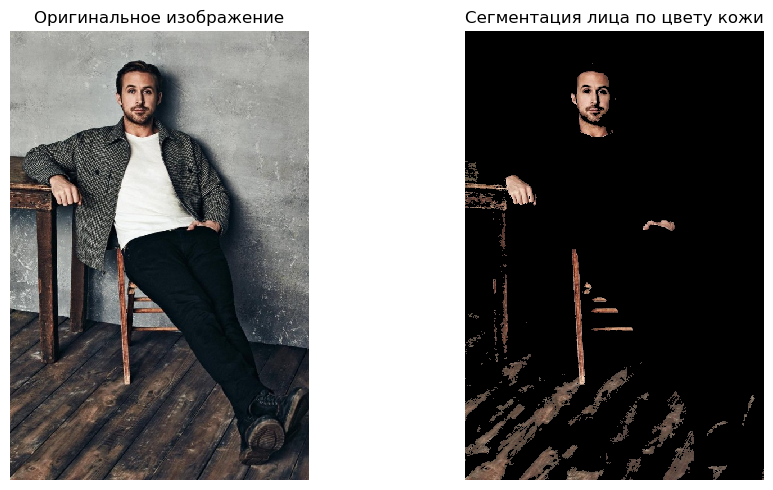

In [75]:

# 2. Сегментация: Цвет кожи
face_image_path = 'face2.jpg'  
face_image = cv2.imread(face_image_path, cv2.IMREAD_COLOR)  # Загрузка изображения в цвете

# Преобразуем изображение из BGR в HSV
face_image_hsv = cv2.cvtColor(face_image, cv2.COLOR_BGR2HSV)

# Определяем диапазон цвета кожи в HSV
lower_skin = np.array([0, 48, 80], dtype=np.uint8)  # Нижняя граница цвета кожи
upper_skin = np.array([20, 255, 255], dtype=np.uint8)  # Верхняя граница цвета кожи

skin_mask = cv2.inRange(face_image_hsv, lower_skin, upper_skin) # Создаем маску для сегментации кожи
skin_segmented = cv2.bitwise_and(face_image, face_image, mask=skin_mask) # Применяем маску к оригинальному изображению для получения сегментированного изображения кожи


fig, axs2 = plt.subplots(1, 2, figsize=(10, 5)) # Отображение оригинального и сегментированного изображения

# Отображаем оригинальное изображение (преобразуем BGR в RGB для корректного отображения)
axs2[0].imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))
axs2[0].set_title('Оригинальное изображение')
axs2[0].axis('off')  # Отключаем оси

# Отображаем сегментированное изображение (также преобразуем BGR в RGB)
axs2[1].imshow(cv2.cvtColor(skin_segmented, cv2.COLOR_BGR2RGB))
axs2[1].set_title('Сегментация лица по цвету кожи')
axs2[1].axis('off')  # Отключаем оси

plt.tight_layout()
plt.show()  


## 2.3. Кластеризация методом k-средних

Метод k-средних используется для разбиения пикселей изображения на несколько кластеров в цветовом пространстве Lab. Это позволяет выделить цветовые группы объектов.



/home/leonidas/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


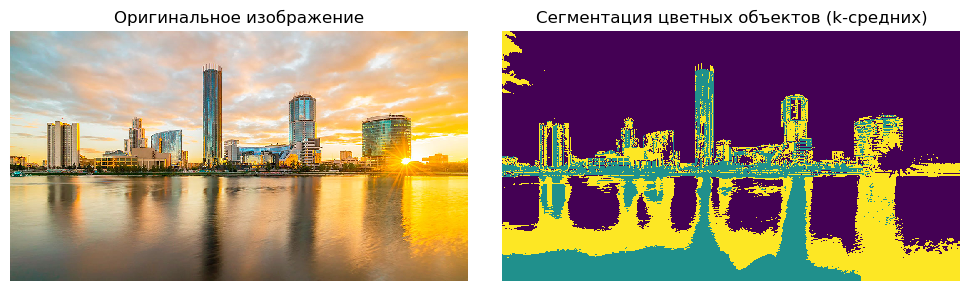

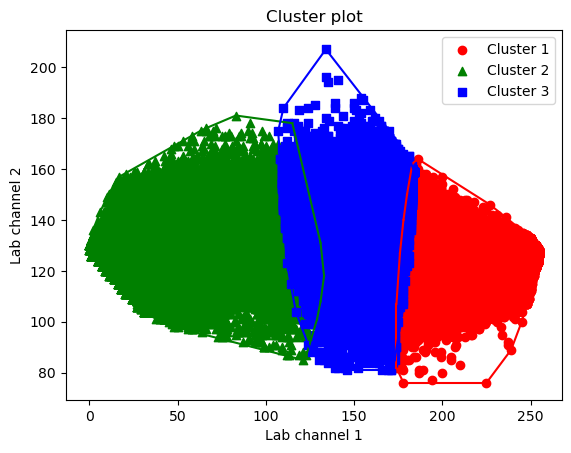

In [ ]:
# 3. Сегментация цветных объектов методом k-средних
objects_image_path = 'objects.jpg' 
objects_image = cv2.imread(objects_image_path, cv2.IMREAD_COLOR)  


lab_image = cv2.cvtColor(objects_image, cv2.COLOR_BGR2Lab) # Преобразование изображения из BGR в LAB цветовое пространство
pixels = lab_image.reshape((-1, 3)) # Изменение формы изображения для передачи в KMeans (преобразуем в 2D массив)

# Инициализация и обучение модели KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Указываем количество кластеров
kmeans.fit(pixels)                              # Обучаем модель на пикселях

# Получение сегментированного изображения (метки кластеров)
segmented_image = kmeans.labels_.reshape(objects_image.shape[:2])  # Преобразуем метки обратно в форму изображения

fig, axs3 = plt.subplots(1, 2, figsize=(10, 5))

axs3[0].imshow(cv2.cvtColor(objects_image, cv2.COLOR_BGR2RGB))  # Преобразуем BGR в RGB для корректного отображения
axs3[0].set_title('Оригинальное изображение')
axs3[0].axis('off') 

axs3[1].imshow(segmented_image, cmap='viridis')                 # Используем цветовую карту 'viridis'
axs3[1].set_title('Сегментация цветных объектов (k-средних)')
axs3[1].axis('off')  

plt.tight_layout() 
plt.show()  

# Визуализация кластеров в LAB пространстве
fig, ax = plt.subplots()
colors = ['red', 'green', 'blue']   # Цвета для кластеров
markers = ['o', '^', 's']           # Маркеры для кластеров

# Получаем метки кластеров
labels = kmeans.labels_.reshape(-1)

# Собираем пиксели по кластерам
cluster_pixels = [pixels[labels == i, :2] for i in range(3)]  # Берем только первые два канала LAB для визуализации

# Рисуем каждый кластер с его выпуклой оболочкой
for i in range(3):
    ax.scatter(cluster_pixels[i][:, 0], cluster_pixels[i][:, 1], c=colors[i], marker=markers[i], label=f'Cluster {i+1}')
    if len(cluster_pixels[i]) >= 3:             # Проверка, чтобы избежать ошибок при построении оболочки
        hull = ConvexHull(cluster_pixels[i])    # Вычисляем выпуклую оболочку кластера
        for simplex in hull.simplices:
            ax.plot(cluster_pixels[i][simplex, 0], cluster_pixels[i][simplex, 1], colors[i])  # Рисуем границы оболочки


ax.set_title('Cluster plot')
ax.set_xlabel('Lab channel 1')
ax.set_ylabel('Lab channel 2')
ax.legend()  

plt.show()  


## 2.4. Текстурная сегментация

Текстурная сегментация анализирует энергетические, контрастные и энтропийные характеристики изображения, что позволяет выделить текстурные особенности объектов.

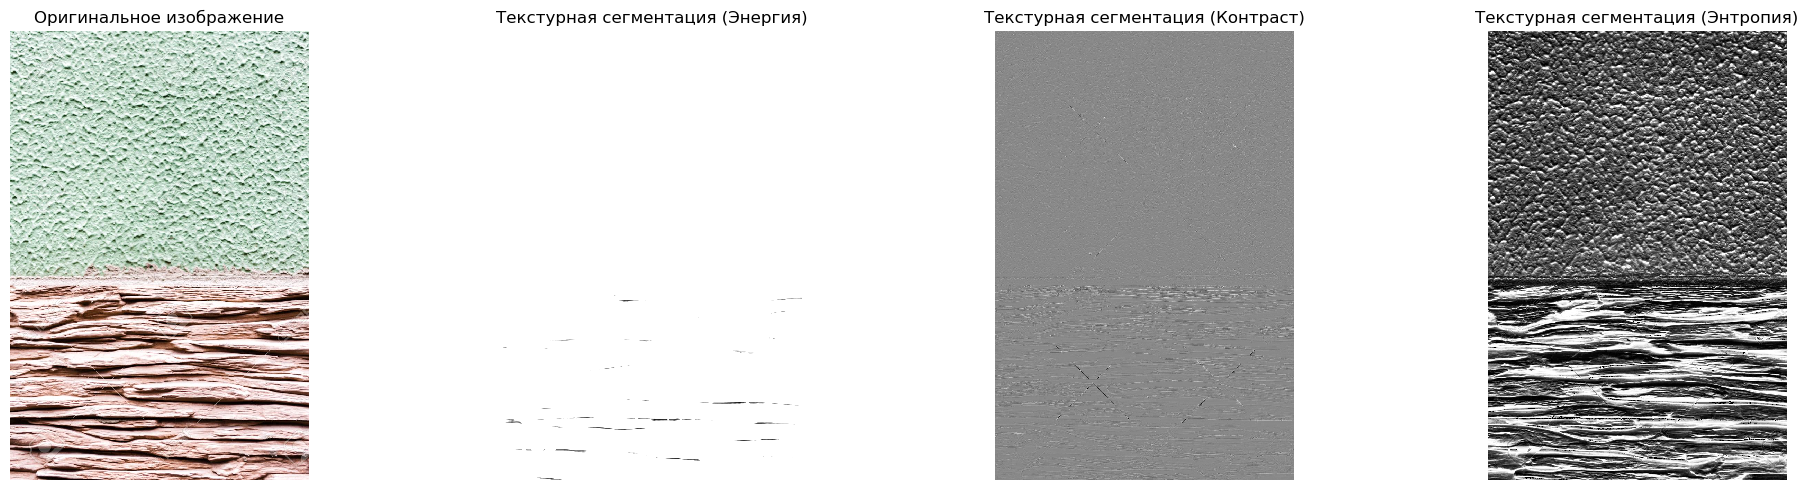

In [77]:
# 4. Текстурная сегментация
texture_image_path = 'texture2.jpg'  # Путь к изображению текстуры

texture_color_image = cv2.imread(texture_image_path, cv2.IMREAD_COLOR)  # Цветное изображение
texture_image = cv2.imread(texture_image_path, cv2.IMREAD_GRAYSCALE)  # Серое изображение


kernel = np.ones((5, 5), np.uint8) # Создание ядра для фильтрации 

# Расчет текстурных признаков
energy = cv2.filter2D(texture_image, -1, kernel)            # Энергия текстуры (фильтрация)
contrast = cv2.Laplacian(texture_image, cv2.CV_64F)         # Контраст текстуры (второй производной)
entropy = -texture_image * np.log2(texture_image + 1e-9)    # Энтропия текстуры


fig, axs4 = plt.subplots(1, 4, figsize=(20, 5))


axs4[0].imshow(cv2.cvtColor(texture_color_image, cv2.COLOR_BGR2RGB))  
axs4[0].set_title('Оригинальное изображение')
axs4[0].axis('off') 


axs4[1].imshow(energy, cmap='gray')  
axs4[1].set_title('Текстурная сегментация (Энергия)')
axs4[1].axis('off') 


axs4[2].imshow(contrast, cmap='gray') 
axs4[2].set_title('Текстурная сегментация (Контраст)')
axs4[2].axis('off')  


axs4[3].imshow(entropy, cmap='gray') 
axs4[3].set_title('Текстурная сегментация (Энтропия)')
axs4[3].axis('off')  

plt.tight_layout() 
plt.show() 


# 4. Выводы о проделанной работе

В ходе работы были реализованы и протестированы различные методы сегментации изображений. Полученные результаты показывают:

Метод Оцу лучше адаптируется к изображениям с неравномерным освещением, обеспечивая более точную бинаризацию.

Сегментация по цвету кожи работает хорошо, но чувствительна к освещению и тону кожи, а также может захватывать области такого же цвета, которые не являются кожей.

Метод k-средних позволяет выделить цветовые области, но не учитывает форму объектов и может требовать постобработки.

Текстурные характеристики помогают анализировать неоднородные поверхности, что полезно для задач с выявлением материалов или паттернов.

Таким образом, выбор метода сегментации зависит от типа изображения и поставленной задачи. Оптимальный результат достигается комбинированием различных методов для учета цвета, формы и текстурных характеристик объектов.